# Movie Collection  on Netflix, Prime Video, Hulu and Disney+

### Import Relevant Dependencies

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib. pyplot as plt
from datetime import datetime 
%matplotlib inline
import numpy as np

### Explore and Clean Data

In [2]:
# Assigned variable to csv file
stream_movies= pd.read_csv('MoviesOnStreamingPlatforms_updated.csv.zip', parse_dates=True)
stream_movies.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [3]:
# View Size
stream_movies.size

284648

In [4]:
# View columns
stream_movies.columns

Index(['Unnamed: 0', 'ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes',
       'Netflix', 'Hulu', 'Prime Video', 'Disney+', 'Type', 'Directors',
       'Genres', 'Country', 'Language', 'Runtime'],
      dtype='object')

In [5]:
# Review info
stream_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 17 columns):
Unnamed: 0         16744 non-null int64
ID                 16744 non-null int64
Title              16744 non-null object
Year               16744 non-null int64
Age                7354 non-null object
IMDb               16173 non-null float64
Rotten Tomatoes    5158 non-null object
Netflix            16744 non-null int64
Hulu               16744 non-null int64
Prime Video        16744 non-null int64
Disney+            16744 non-null int64
Type               16744 non-null int64
Directors          16018 non-null object
Genres             16469 non-null object
Country            16309 non-null object
Language           16145 non-null object
Runtime            16152 non-null float64
dtypes: float64(2), int64(8), object(7)
memory usage: 2.2+ MB


In [6]:
### Find duplicates
title_series= stream_movies['Title']
title_series.duplicated().sum()

0

In [7]:
# Missing Values
stream_movies.isnull().sum()

Unnamed: 0             0
ID                     0
Title                  0
Year                   0
Age                 9390
IMDb                 571
Rotten Tomatoes    11586
Netflix                0
Hulu                   0
Prime Video            0
Disney+                0
Type                   0
Directors            726
Genres               275
Country              435
Language             599
Runtime              592
dtype: int64

In [8]:
# Drop Unnamed and Directors columns
stream_movies= stream_movies.drop(['Directors', 'Unnamed: 0', 'ID','Type'], axis= 1)

In [9]:
# Change Year Column to Datetime 
stream_movies['Year'] = pd.to_datetime(stream_movies['Year'], format='%Y')
stream_movies

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Genres,Country,Language,Runtime
0,Inception,2010-01-01,13+,8.8,87%,1,0,0,0,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,The Matrix,1999-01-01,18+,8.7,87%,1,0,0,0,"Action,Sci-Fi",United States,English,136.0
2,Avengers: Infinity War,2018-01-01,13+,8.5,84%,1,0,0,0,"Action,Adventure,Sci-Fi",United States,English,149.0
3,Back to the Future,1985-01-01,7+,8.5,96%,1,0,0,0,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,"The Good, the Bad and the Ugly",1966-01-01,18+,8.8,97%,1,0,1,0,Western,"Italy,Spain,West Germany",Italian,161.0
5,Spider-Man: Into the Spider-Verse,2018-01-01,7+,8.4,97%,1,0,0,0,"Animation,Action,Adventure,Family,Sci-Fi",United States,"English,Spanish",117.0
6,The Pianist,2002-01-01,18+,8.5,95%,1,0,1,0,"Biography,Drama,Music,War","United Kingdom,France,Poland,Germany","English,German,Russian",150.0
7,Django Unchained,2012-01-01,18+,8.4,87%,1,0,0,0,"Drama,Western",United States,"English,German,French,Italian",165.0
8,Raiders of the Lost Ark,1981-01-01,7+,8.4,95%,1,0,0,0,"Action,Adventure",United States,"English,German,Hebrew,Spanish,Arabic,Nepali",115.0
9,Inglourious Basterds,2009-01-01,18+,8.3,89%,1,0,0,0,"Adventure,Drama,War","Germany,United States","English,German,French,Italian",153.0


In [10]:
# Extract only Year and add new column
# stream_movies['Release Year']= stream_movies['Year'].dt.year
stream_movies.columns
stream_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 13 columns):
Title              16744 non-null object
Year               16744 non-null datetime64[ns]
Age                7354 non-null object
IMDb               16173 non-null float64
Rotten Tomatoes    5158 non-null object
Netflix            16744 non-null int64
Hulu               16744 non-null int64
Prime Video        16744 non-null int64
Disney+            16744 non-null int64
Genres             16469 non-null object
Country            16309 non-null object
Language           16145 non-null object
Runtime            16152 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(4), object(6)
memory usage: 1.7+ MB


In [11]:
# Replace NA Values to O
stream_movies.fillna(0, inplace= True)

In [12]:
# Top Movie Count by Country
country_count= stream_movies['Country'].value_counts().nlargest(11).drop(0)
country_count=country_count.to_frame().reset_index()
country_count

,index,Country
0,United States,8776
1,India,1064
2,United Kingdom,905
3,Canada,555
4,Australia,202
5,Japan,175
6,"United Kingdom,United States",172
7,France,167
8,Hong Kong,153
9,"Canada,United States",150


In [13]:
country_count.rename(columns={"index": "Country Name", "Country": "Movie Count by Country"}, inplace= True)
country_count

,Country Name,Movie Count by Country
0,United States,8776
1,India,1064
2,United Kingdom,905
3,Canada,555
4,Australia,202
5,Japan,175
6,"United Kingdom,United States",172
7,France,167
8,Hong Kong,153
9,"Canada,United States",150


In [14]:
### Count of Movie by Age
stream_movies['Age'].value_counts()

0      9390
18+    3474
7+     1462
13+    1255
all     843
16+     320
Name: Age, dtype: int64

In [15]:
# Top 10 Movie Count by Genre
stream_movies['Genres'].value_counts().nlargest(10).drop(0)

Drama                   1341
Documentary             1229
Comedy                  1040
Comedy,Drama             446
Horror                   436
Drama,Romance            397
Comedy,Drama,Romance     333
Horror,Thriller          297
Comedy,Romance           289
Name: Genres, dtype: int64

In [16]:
### Top 10 Movie Titles by year
stream_movies['Year'].value_counts().sort_values(ascending= False).nlargest(10)

2017-01-01    1401
2018-01-01    1285
2016-01-01    1206
2015-01-01    1065
2014-01-01     986
2013-01-01     964
2012-01-01     843
2019-01-01     689
2011-01-01     645
2009-01-01     548
Name: Year, dtype: int64

### Grouping, Aggregation and visualizations

In [17]:
stream_movies.columns

Index(['Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes', 'Netflix', 'Hulu',
       'Prime Video', 'Disney+', 'Genres', 'Country', 'Language', 'Runtime'],
      dtype='object')

In [18]:
# Merge all Stream Platforms into one column
stream_movies= stream_movies.melt(id_vars= ['Title', 'Age', 'IMDb', 'Rotten Tomatoes', 'Genres', 'Country', 'Language',
       'Runtime', 'Year' ])

In [19]:
stream_movies.columns

Index(['Title', 'Age', 'IMDb', 'Rotten Tomatoes', 'Genres', 'Country',
       'Language', 'Runtime', 'Year', 'variable', 'value'],
      dtype='object')

In [20]:
# Extract only Stream Platform with value one 
stream_movies_only= stream_movies[stream_movies['value']== 1]

In [21]:
stream_movies_only.columns

Index(['Title', 'Age', 'IMDb', 'Rotten Tomatoes', 'Genres', 'Country',
       'Language', 'Runtime', 'Year', 'variable', 'value'],
      dtype='object')

In [22]:
# Rename Column
stream_movies_only.rename(columns={"Title": "Movie Name", "Age": "Rating", 'variable': 'Platform Name', 'Year': 'Release Year' }, inplace= True)

/Users/elianasuarez/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [23]:
#Fill na with 0
stream_movies_only.fillna(0, inplace= True)

/Users/elianasuarez/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [24]:
# Drop value column
stream_movies_only= stream_movies_only.drop(['value'], axis= 1)

In [25]:
#Extract only columns with values 
stream_movies_only = stream_movies_only[(stream_movies_only != 0).all(axis=1)]
stream_movies_only.isnull().sum()

Movie Name         0
Rating             0
IMDb               0
Rotten Tomatoes    0
Genres             0
Country            0
Language           0
Runtime            0
Release Year       0
Platform Name      0
dtype: int64

In [26]:
# Save data frame as csv  
stream_movies_only.to_csv("MovieStreamDataset.csv")

In [27]:
stream_movies_only

,Movie Name,Rating,IMDb,Rotten Tomatoes,Genres,Country,Language,Runtime,Release Year,Platform Name
0,Inception,13+,8.8,87%,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0,2010-01-01,Netflix
1,The Matrix,18+,8.7,87%,"Action,Sci-Fi",United States,English,136.0,1999-01-01,Netflix
2,Avengers: Infinity War,13+,8.5,84%,"Action,Adventure,Sci-Fi",United States,English,149.0,2018-01-01,Netflix
3,Back to the Future,7+,8.5,96%,"Adventure,Comedy,Sci-Fi",United States,English,116.0,1985-01-01,Netflix
4,"The Good, the Bad and the Ugly",18+,8.8,97%,Western,"Italy,Spain,West Germany",Italian,161.0,1966-01-01,Netflix
5,Spider-Man: Into the Spider-Verse,7+,8.4,97%,"Animation,Action,Adventure,Family,Sci-Fi",United States,"English,Spanish",117.0,2018-01-01,Netflix
6,The Pianist,18+,8.5,95%,"Biography,Drama,Music,War","United Kingdom,France,Poland,Germany","English,German,Russian",150.0,2002-01-01,Netflix
7,Django Unchained,18+,8.4,87%,"Drama,Western",United States,"English,German,French,Italian",165.0,2012-01-01,Netflix
8,Raiders of the Lost Ark,7+,8.4,95%,"Action,Adventure",United States,"English,German,Hebrew,Spanish,Arabic,Nepali",115.0,1981-01-01,Netflix
9,Inglourious Basterds,18+,8.3,89%,"Adventure,Drama,War","Germany,United States","English,German,French,Italian",153.0,2009-01-01,Netflix


<Figure size 1440x648 with 0 Axes>

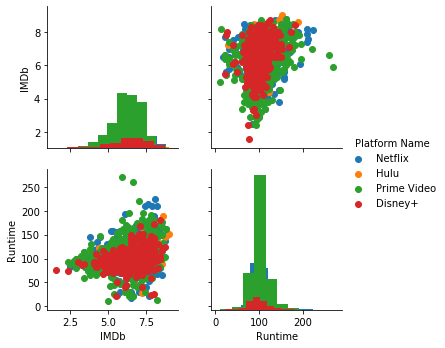

In [94]:
# Set the width and height of the figure
plt.figure(figsize=(20,9))

# Compare separate categorical variable
g= sns.PairGrid(stream_movies_only, hue= 'Platform Name')
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();

# Save Image
plt.savefig('Images/VariableComparison.pdf', dpi=300)

<Figure size 1440x648 with 0 Axes>

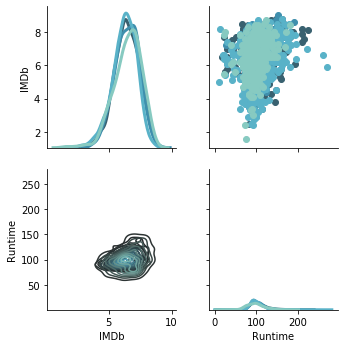

In [96]:
# Set the width and height of the figure
plt.figure(figsize=(20, 9))

#Use Different function for the lower and upper to emphasize different aspects of the relationship
g = sns.PairGrid(stream_movies_only, hue= 'Platform Name', palette="GnBu_d")
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=3, legend=False);

# Save Image
plt.savefig('Images/UpperLowerVariableComparison.pdf', dpi=300)

In [31]:
# Platform with highest number of movies 
movie_count= stream_movies_only[['Platform Name','Movie Name']].groupby('Platform Name').count()
movie_count= movie_count.reset_index()
movie_count

,Platform Name,Movie Name
0,Disney+,337
1,Hulu,432
2,Netflix,1010
3,Prime Video,1830


In [32]:
# Rename Column 
movie_count.rename(columns={'Movie Name': 'Number of Movies by Platform'}, inplace= True)

In [33]:
movie_count

,Platform Name,Number of Movies by Platform
0,Disney+,337
1,Hulu,432
2,Netflix,1010
3,Prime Video,1830


No handles with labels found to put in legend.


Text(0.5, 1.0, 'Movie Count per Stream Platform')

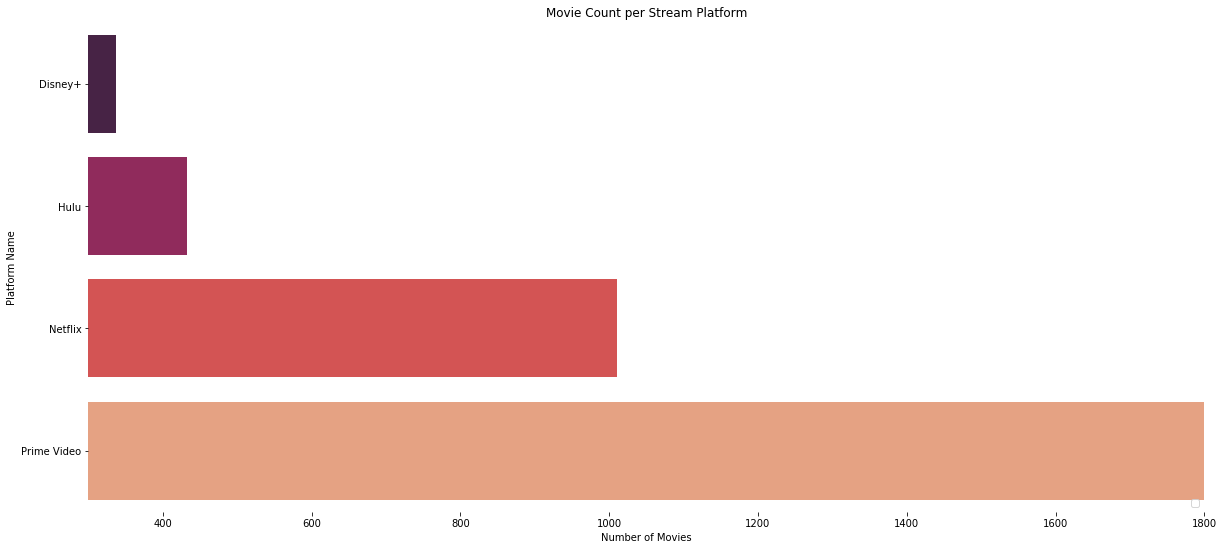

In [34]:
#Plot Number of Movies by Platform
f, ax = plt.subplots(figsize=(20, 9))
# Plot the total crashes
sns.barplot(x='Number of Movies by Platform', y="Platform Name", data= movie_count,
             palette='rocket')

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(300, 1800), ylabel='Platform Name',
       xlabel='Number of Movies')
sns.despine(left=True, bottom=True)

# Add title
plt.title("Movie Count per Stream Platform")

In [40]:
# Movies with the highest rank 
highest_rank_movies= stream_movies_only[['Platform Name','Movie Name', 'IMDb','Rotten Tomatoes']].groupby('Platform Name').max().sort_values(by= 'IMDb', ascending= False)

In [41]:
# Countries with Highest number of movies per stream platform
country_platform_number= stream_movies_only[['Platform Name','Country', 'Movie Name']].groupby(['Country', 'Platform Name']).count().sort_values(by= 'Movie Name', ascending= False).reset_index()
country_platform_number=country_platform_number.rename(columns={'Movie Name': 'Movie Count'}).drop(0)

In [42]:
# Select only columns with values 
country_platform_number=country_platform_number[(country_platform_number[['Country']] != 0).all(axis=1)]


In [43]:
# Top 10 Movies 
top_10_country= country_platform_number.nlargest(10, 'Movie Count')
top_10_country 

,Country,Platform Name,Movie Count
1,United States,Netflix,521
2,United States,Disney+,268
3,United States,Hulu,249
4,United Kingdom,Prime Video,124
5,India,Netflix,62
6,Canada,Prime Video,55
7,"United Kingdom,United States",Prime Video,46
8,India,Prime Video,42
9,Australia,Prime Video,35
10,United Kingdom,Netflix,31


Text(0.5, 1, 'Top 10 Countries with Highest Number of Movies')

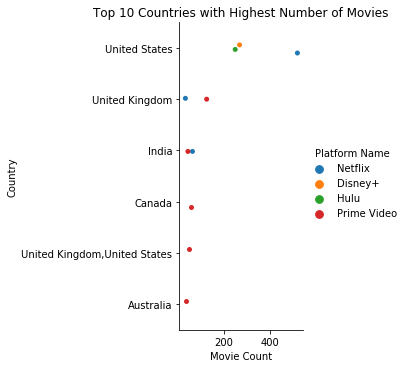

In [90]:
# Top 10 Movies Visualization

# Plot chart
sns.catplot(x= 'Movie Count',y="Country", hue='Platform Name', data= top_10_country)

# Add title
plt.title("Top 10 Countries with Highest Number of Movies")


In [46]:
# Bottom 10 Movies 
country_platform_number.nsmallest(10, 'Movie Count')

,Country,Platform Name,Movie Count
151,"United Kingdom,Luxembourg,United States",Prime Video,1
152,"United Kingdom,Italy,Switzerland",Hulu,1
153,"United Kingdom,Ireland",Disney+,1
154,"United Kingdom,Ireland",Hulu,1
155,"United Kingdom,Jordan,Qatar,Iran",Netflix,1
156,"United Kingdom,India,United States",Netflix,1
157,"United Kingdom,South Africa,United States,Germany",Prime Video,1
158,"United Kingdom,Ireland",Prime Video,1
159,"United Kingdom,Japan",Netflix,1
160,"United Kingdom,South Africa,United Arab Emirates",Prime Video,1


In [70]:
# Select Columns 
movies_rating= stream_movies_only[['Platform Name','Rating', 'Movie Name']].rename(columns={'Movie Name': 'Movie Count'})

In [84]:
# Highest number of movies per stream platform by Rating
platform_rating = movies_rating[(movies_rating[['Rating']] != 0).all(axis=1)].groupby(['Platform Name','Rating']).count().sort_values(by='Movie Count', ascending= False)
platform_rating= platform_rating.reset_index()
platform_rating

,Platform Name,Rating,Movie Count
0,Prime Video,18+,2612
1,Prime Video,7+,916
2,Prime Video,13+,819
3,Netflix,18+,752
4,Prime Video,all,406
5,Netflix,13+,383
6,Netflix,7+,323
7,Hulu,18+,290
8,Disney+,all,277
9,Prime Video,16+,226


In [49]:
# Highest number of movies per stream platform by Genre
genre_movies= stream_movies_only[['Platform Name','Genres', 'Movie Name','Release Year']].groupby(['Platform Name','Genres','Release Year']).count().sort_values(by= 'Movie Name', ascending= False)
genre_movies= genre_movies.reset_index().sort_values(by= 'Movie Name', ascending= False)
genre_movies

,Platform Name,Genres,Release Year,Movie Name
0,Prime Video,Drama,2017-01-01,17
1,Prime Video,Drama,2015-01-01,14
2,Prime Video,Drama,2012-01-01,12
3,Netflix,Comedy,2019-01-01,11
4,Prime Video,Drama,2014-01-01,11
5,Netflix,Drama,2018-01-01,11
6,Netflix,Comedy,2017-01-01,10
7,Prime Video,Drama,2013-01-01,10
12,Prime Video,Comedy,2013-01-01,9
13,Netflix,Drama,2017-01-01,9


In [63]:
#Select only Genres, Movie Count, and nam
genre_movies_group= genre_movies.groupby(['Genres','Platform Name']).sum().sort_values(by='Movie Name', ascending= False)

In [64]:
# Set Index
genre_movies_group=genre_movies_group.reset_index()

/Users/elianasuarez/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


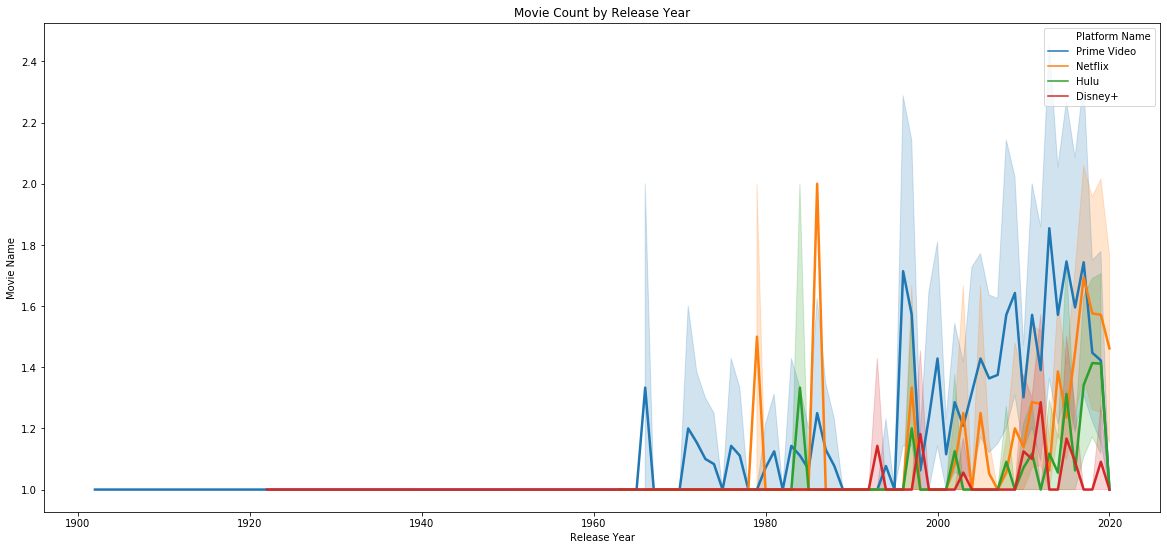

In [97]:
#Visualization of Number of Movies by Year and Genre

# set size and format
plt.figure(figsize=(20,9))

# Add title
plt.title("Movie Count by Release Year")

# set plot
sns.lineplot(data= genre_movies, x='Release Year',y= 'Movie Name', hue='Platform Name',palette="tab10", linewidth=2.5)

#Save Image
plt.savefig('Images/MovieCountReleaseYear.pdf', dpi=300)

In [31]:
stream_movies_only

Index(['Movie Name', 'Rating', 'IMDb', 'Rotten Tomatoes', 'Genres', 'Country',
       'Language', 'Runtime', 'Release Year', 'Platform Name'],
      dtype='object')

In [32]:
# Select Movie Name, Rotten Tomatoes, Platform name
rotten_tom_reviews= stream_movies_only[['Platform Name', 'Rotten Tomatoes']]

In [33]:
# Select only movies with Rotten Tomatoes Reviews 
rotten_reviews= rotten_tom_reviews[(rotten_tom_reviews[['Rotten Tomatoes']] != 0).all(axis=1)]

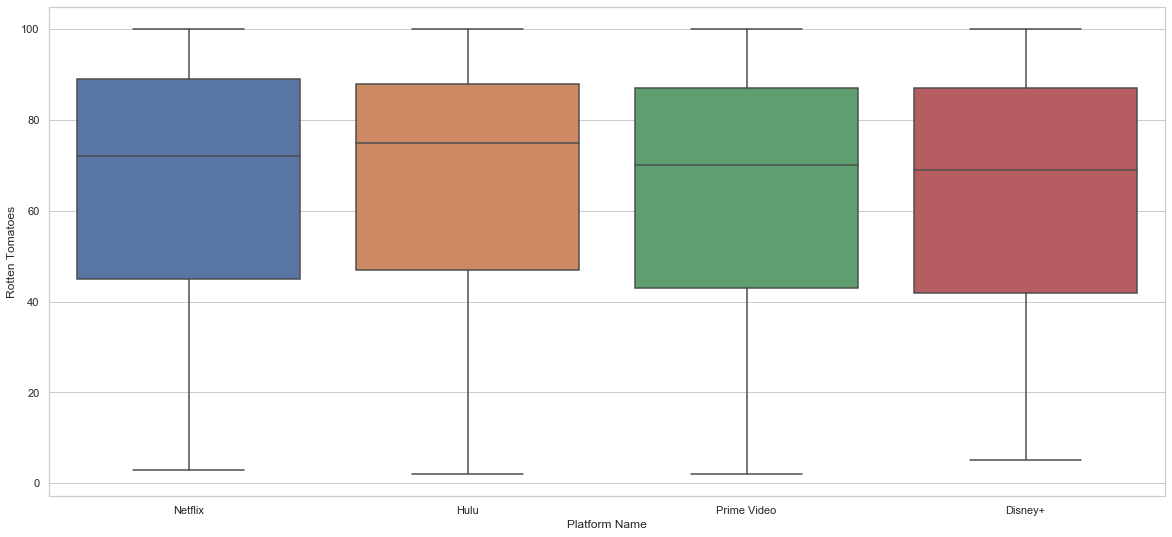

In [256]:
# Rotten Tomatoes Reviews by Stream Service Visualizations
plt.figure(figsize=(20,9))
sns.set_style("whitegrid")
ax = sns.boxplot(x="Platform Name", y="Rotten Tomatoes", data=rotten_reviews)

In [34]:
# Review  Rotten Tomatoes Column Value 
print(rotten_reviews['Rotten Tomatoes'].dtypes)

object


In [47]:
# Check Rotten Tomatoes Values 
rotten_reviews['Rotten Tomatoes'] = rotten_reviews['Rotten Tomatoes'].str.replace('%', '').astype(float)

AttributeError: Can only use .str accessor with string values, which use np.object_ dtype in pandas

In [49]:
# Review Rotten Tomatoes Value
print(rotten_reviews['Rotten Tomatoes'].dtypes)

float64


In [253]:
#Calculate Rotten Tomatoes Mean per Stream Service
rotten_tom_avg=rotten_reviews.groupby('Platform Name').mean()
rotten_tom_avg['Rotten Tomatoes'].map("{:,.2f}%".format)

Platform Name
Disney+        64.26%
Hulu           66.87%
Netflix        66.20%
Prime Video    64.34%
Name: Rotten Tomatoes, dtype: object

In [254]:
rotten_tom_avg= rotten_tom_avg.reset_index()
rotten_tom_avg

,Platform Name,Rotten Tomatoes
0,Disney+,64.255072
1,Hulu,66.872841
2,Netflix,66.196216
3,Prime Video,64.336042


In [290]:
# Calculate IMDb Review Average per Stream Service
imdb_reviews= stream_movies_only[['Platform Name','IMDb']]
imdb_reviews

,Platform Name,IMDb
0,Netflix,8.8
1,Netflix,8.7
2,Netflix,8.5
3,Netflix,8.5
4,Netflix,8.8
5,Netflix,8.4
6,Netflix,8.5
7,Netflix,8.4
8,Netflix,8.4
9,Netflix,8.3


In [291]:
# Select only movies with reviews
imdb_reviews= imdb_reviews[(imdb_reviews[['IMDb']] != 0).all(axis=1)]

In [239]:
#Select columns 
movie_rank =stream_movies_only[['Platform Name','Movie Name', 'IMDb', 'Country', 'Runtime']]

In [287]:
#Top Movies per Platform Name sort by IMDb including country
movie_rev= movie_rank [(movie_rank [['Country', 'Runtime']] != 0).all(axis=1)].groupby(['IMDb','Platform Name', 'Country', 'Runtime']).max().sort_values(by= 'IMDb', ascending= False)
movie_rev= movie_rev.reset_index

In [299]:
# Select only movies with genre and IMDb values
genre_imdb= stream_movies_only[['Platform Name','Genres','Movie Name', 'IMDb']]
genre_imdb_reviews= genre_imdb[(stream_movies_only[['IMDb', 'Genres']] != 0).all(axis=1)]

In [302]:
#Bottom Movies per Platform Name and Genre sort by IMDb
genre_imdb_reviews[['Platform Name','Genres','Movie Name', 'IMDb']].groupby(['IMDb','Genres']).min()


Platform Name  \
IMDb Genres                                                             
1.0  Documentary                                          Prime Video   
     Documentary,Music                                    Prime Video   
1.3  Action,Comedy,Fantasy,Horror,Mystery,Sci-Fi,Thr...   Prime Video   
1.4  Drama,Family,Fantasy,Musical                         Prime Video   
     Drama,Sci-Fi,Thriller                                    Netflix   
     Horror                                               Prime Video   
1.5  Action,Adventure,Comedy,Fantasy,Horror,Sci-Fi,T...   Prime Video   
     Action,Crime,Drama                                   Prime Video   
1.6  Action,Adventure,Fantasy                             Prime Video   
     Action,Drama,Horror,Sci-Fi,Thriller,War              Prime Video   
     Animation,Adventure                                  Prime Video   
     Animation,Family                                     Prime Video   
     Animation,Family,Fantasy,Romance                     Prime Video   
     Comedy,Drama,Romance                                     Netflix   
     Documentary,Music                                        Disney+   
     Horror                                               Prime Video   
     Thriller                                             Prime Video   
1.7  Action,Adventure,Drama,Fantasy,Horror,Mystery,S...   Prime Video   
     Action,Adventure,Sci-Fi,Thriller                     Prime Video   
     Action,Comedy                                            Netflix   
     Action,Sci-Fi,Thriller                               Prime Video   
     Animation,Action,Drama,Sci-Fi                        Prime Video   
     Comedy                                               Prime Video   
     Horror                                               Prime Video   
     Horror,Thriller                                      Prime Video   
1.8  Action,Adventure,Drama,Sci-Fi,Thriller               Prime Video   
     Action,Adventure,Sci-Fi,Thriller                     Prime Video   
     Horror                                               Prime Video   
     Horror,Mystery,Thriller                              Prime Video   
     Horror,Thriller                                      Prime Video   
...                                                               ...   
8.7  Music                                                Prime Video   
8.8  Action,Adventure,Sci-Fi,Thriller                         Netflix   
     Animation,Comedy,Fantasy,Horror,Sci-Fi,Thriller      Prime Video   
     Biography,Drama                                      Prime Video   
     Documentary                                          Prime Video   
     Documentary,Biography,Family,Sport                   Prime Video   
     Documentary,Family                                   Prime Video   
     Family                                               Prime Video   
     Short,Drama,Thriller                                 Prime Video   
     Western                                                  Netflix   
8.9  Action,Drama,War                                     Prime Video   
     Comedy,Drama                                         Prime Video   
     Documentary                                          Prime Video   
     Documentary,Drama,Family,Music                       Prime Video   
     Documentary,Drama,War                                Prime Video   
     Documentary,History,Music,News                       Prime Video   
     Documentary,Music                                    Prime Video   
     Documentary,Music,War                                Prime Video   
9.0  Action,Crime,Drama,Thriller                                 Hulu   
     Documentary                                          Prime Video   
     Documentary,Biography,Drama,News                     Prime Video   
9.1  Documentary                                          Prime Video   
     Documentary,Family,History,War      